In [1]:
# 데이터 출처: https://archive.ics.uci.edu/dataset/222/bank+marketing
# Github 출처: https://github.com/uci-ml-repo/ucimlrepo

#기본 모듈 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# warning을 모두 무시하는 것은 좋지 않으나 과제 수행을 쉽게할 수 있도록 무시설정
import warnings
warnings.filterwarnings(action='ignore')

## 문제1: 라이브러리를 통해 데이터 불러오기
- 다음코드는 데이터를 불러오고 df 변수명에 저장하는 코드입니다.
- github 문서를 읽고 데이터를 요청하여 로컬환경에 저장해보세요

In [2]:
#%pip install -U ucimlrepo

In [3]:
'''문제 시작'''
from ucimlrepo import fetch_ucirepo

# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

df = pd.concat([X,y], axis=1)

df.to_csv('./bank_marketing.csv', index=False)
'''문제 끝'''
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


## 데이터 전처리 & EDA 간단히

In [4]:
#데이터 불러오기 
df = pd.read_csv('./bank_marketing.csv')

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33908, 16) (11303, 16) (33908, 1) (11303, 1)


In [5]:
X_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,33908.000000,33688,33908,32522,33908,33908.000000,33908,33908,24180,33908.000000,33908,33908.000000,33908.000000,33908.000000,33908.000000,6153
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,10310,NaN,NaN,NaN,NaN,3645
mean,40.907957,NaN,NaN,NaN,NaN,1362.457709,NaN,NaN,NaN,15.825233,NaN,258.473015,2.759555,40.024979,0.582635,NaN
std,10.620338,NaN,NaN,NaN,NaN,3052.176471,NaN,NaN,NaN,8.339007,NaN,258.936344,3.094060,100.018015,2.445884,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1432.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


<수치형 변수 시각화>
- balance: average yearly balance, 연간 평균 잔액
- day_of_week: last contact day of the week
- duration: last contact duration, in **seconds (numeric)**. Important note: this attribute highly affects the output target (e.g., **if duration=0 then y='no'**). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact), 이번 캠패인 동안 이 고객에게 컨택한 횟수
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; **-1 means client was not previously contacted**), 이전 캠페인을 마지막으로 연락한 후 경과한 일수
- previous: number of contacts performed before this campaign and for this client

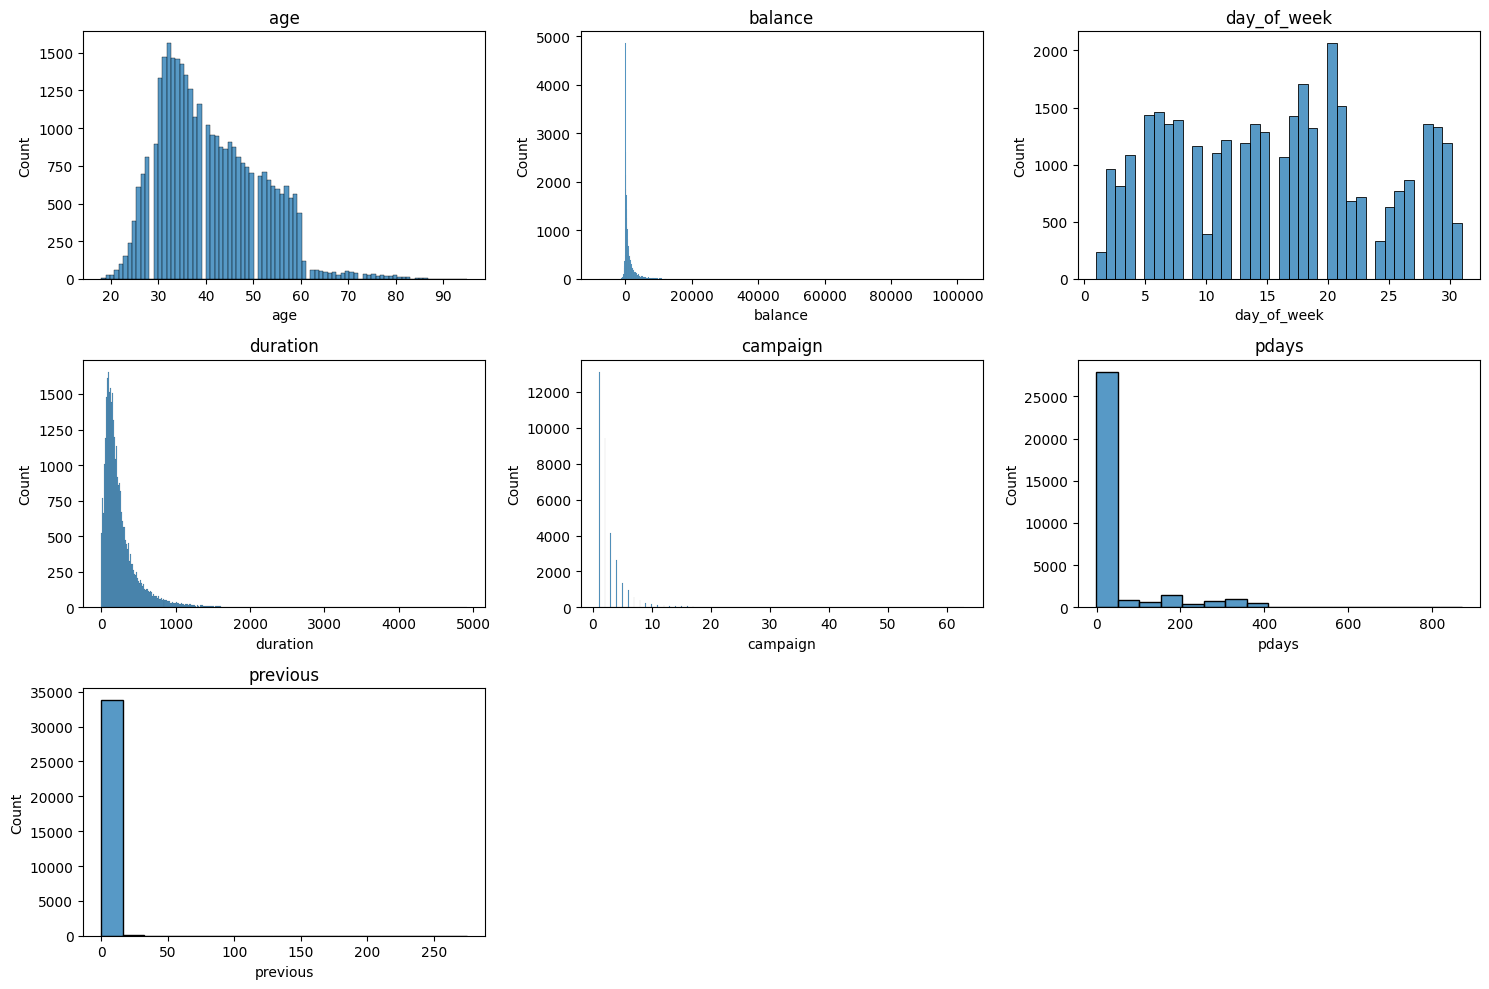

In [6]:
#수치형 변수 시각화
def get_3_hist(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_hist(X_train, numeric_col)

In [7]:
# 이상치가 많은 컬럼에 대해서 로그스케일 적용

#balance 값 보정
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min


# 로그스케일 적용
for col in ['duration','balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [8]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.907957,9.118624,15.825233,5.172125,2.759555,40.024979,0.225184
std,10.620338,0.214213,8.339007,0.922256,3.094060,100.018015,0.533092
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.998878,8.000000,4.644391,1.000000,-1.000000,0.000000
50%,39.000000,9.044404,16.000000,5.198497,2.000000,-1.000000,0.000000
75%,48.000000,9.153982,21.000000,5.765191,3.000000,-1.000000,0.000000
max,95.000000,11.609571,31.000000,8.500861,63.000000,871.000000,5.620401


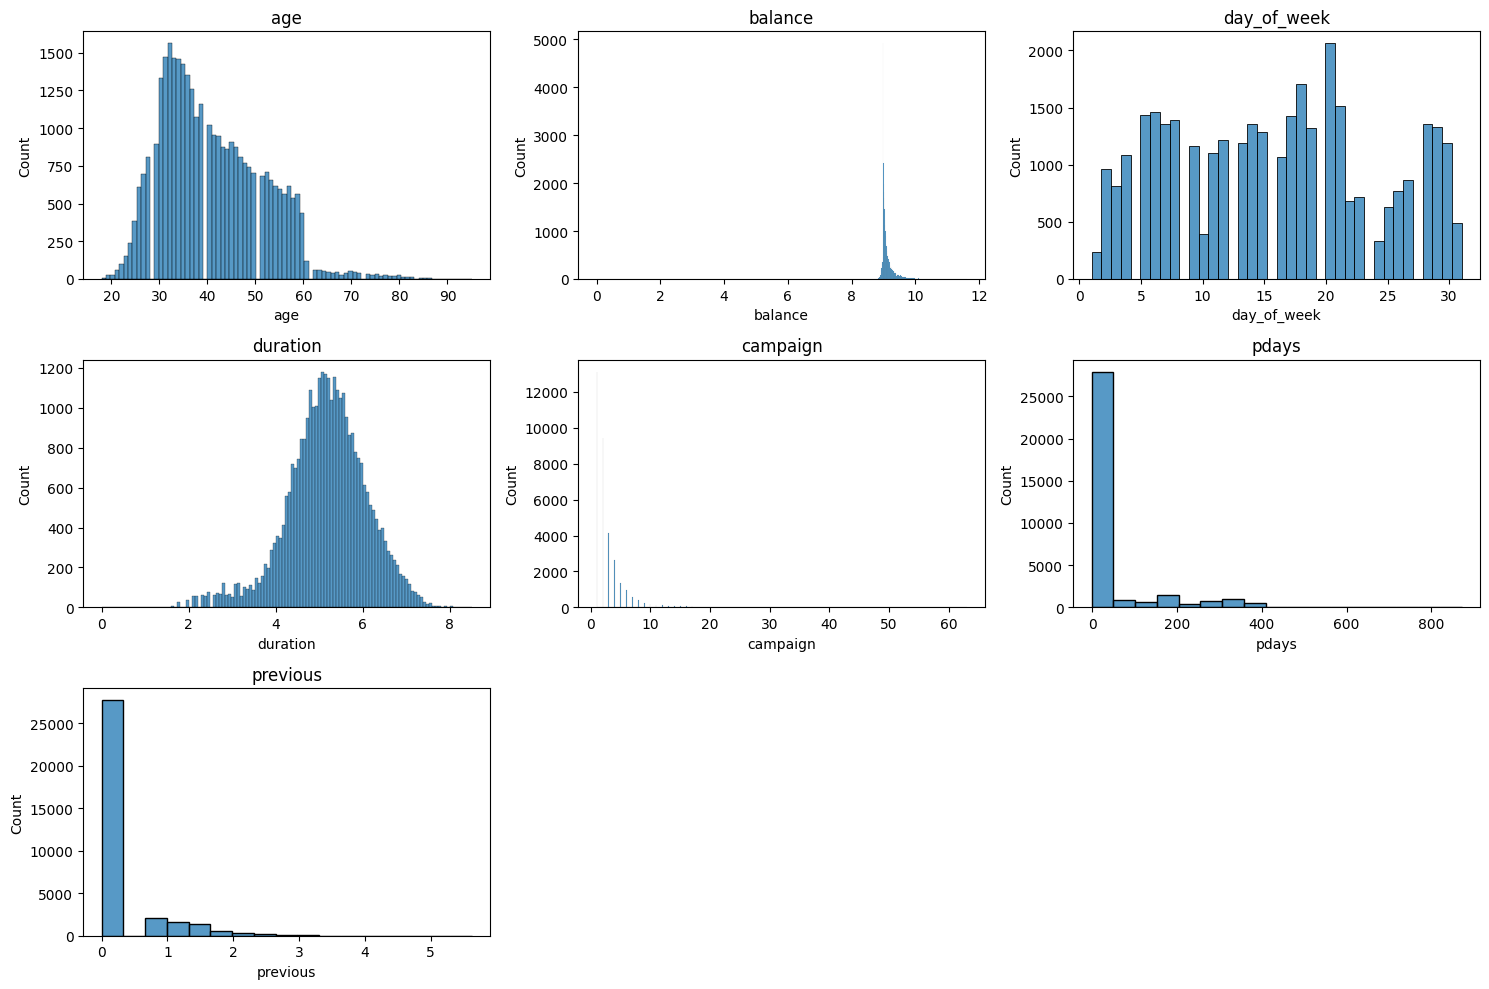

In [9]:
#로그스케일 변환 후 시각화
get_3_hist(X_train, numeric_col)

## 문제 2: Y 변수 인코딩 적용하기 
- Y 라벨을 no,yes를 사용자 정의함수와 apply를 이용하여 0,1로 인코딩 하세요
- 함수명은 get_binary로 설정하세요.
- Pandas docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [10]:
'''문제 시작'''

def get_binary(x):
    """
    주어진 문자열 x가 'no'일 경우 0을 반환하고, 그렇지 않을 경우 1을 반환합니다.
    이 함수는 일반적으로 두 가지 범주(예: 'yes'와 'no')를 가진 데이터를 이진 형식(0과 1)으로 변환하는 데 사용됩니다.

    Args:
        x (str): 변환할 문자열. 'no' 또는 그 외의 값을 가질 수 있습니다.
    Returns:
        int: 문자열 x가 'no'일 경우 0, 그렇지 않을 경우 1을 반환합니다.
    """
    # 이부분을 작성해주세요
    if x=='no':
        return 0
    else: 
        return 1
    
# y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)

# y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)


'''문제 끝'''
#잘 적용되었는지 확인
display(y_train[:10])

,y
24915,0
11794,0
1279,0
913,0
5554,0
24126,1
38658,0
5469,0
14012,0
15788,0


In [11]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,58,management,married,tertiary,no,8.989694,yes,no,cellular,18,nov,5.583496,1,188,0.693147,failure
11794,47,services,divorced,secondary,no,9.024854,no,no,NaN,20,jun,4.158883,1,-1,0.000000,NaN
1279,35,management,single,tertiary,no,9.084437,yes,no,NaN,8,may,4.406719,1,-1,0.000000,NaN
913,34,admin.,divorced,secondary,no,9.064968,yes,no,NaN,7,may,5.648974,2,-1,0.000000,NaN
5554,35,admin.,single,secondary,no,9.000976,yes,no,NaN,23,may,5.225747,4,-1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,management,single,tertiary,no,9.119650,yes,yes,NaN,9,jun,5.963579,12,-1,0.000000,NaN
26216,40,services,single,secondary,no,9.166075,yes,no,cellular,20,nov,6.006353,1,-1,0.000000,NaN
15941,36,admin.,single,secondary,no,8.992433,yes,no,cellular,22,jul,4.356709,5,-1,0.000000,NaN
16952,45,blue-collar,married,secondary,no,8.999496,yes,no,cellular,25,jul,4.595120,1,-1,0.000000,NaN


## 문제3: 간단한 모델링 & 평가함수 생성하기
- 평가하기 위한 다음 함수를 완성하세요
- 필요한 모듈율 불러오고, 학습시키고, 결과를 저장하세요
    - y_pred_train : 훈련데이터 예측결과 변수
    - y_pred_test: 테스트데이터 예측결과 변수

In [12]:
X_train['duration']

24915    5.583496
11794    4.158883
1279     4.406719
913      5.648974
5554     5.225747
           ...   
10010    5.963579
26216    6.006353
15941    4.356709
16952    4.595120
34781    5.429346
Name: duration, Length: 33908, dtype: float64

In [13]:
def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    """ train과 test 데이터와 X변수 컬럼을 받아 평가지표를 내는 함수입니다.

    Args:
        train (pd.DataFrame): train 데이터프레임
        test (pd.DataFrame): test 데이터프레임
        x_var_list (list): 모델링에 사용할 변수 리스트
    """
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    '''문제 시작'''
    #모듈불러오기
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    
    #모델가져오기 & 학습하기
    model = LogisticRegression()
    lr_model = model.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    '''문제 끝'''
    
    #평가표 생성
    result = pd.DataFrame({'acc' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
                            'f1_score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)]},
                            index = ['train','test'])
    
    display(result.round(2))

# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

,acc,f1_score
train,0.89,0.23
test,0.89,0.20


## 문제4: 모델링 수행하기
- 전체 변수를 가공하여 예측모델링을 수행하는 함수 get_numeric_sc를 완성해보세요

In [14]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,58,management,married,tertiary,no,8.989694,yes,no,cellular,18,nov,5.583496,1,188,0.693147,failure
11794,47,services,divorced,secondary,no,9.024854,no,no,NaN,20,jun,4.158883,1,-1,0.000000,NaN
1279,35,management,single,tertiary,no,9.084437,yes,no,NaN,8,may,4.406719,1,-1,0.000000,NaN
913,34,admin.,divorced,secondary,no,9.064968,yes,no,NaN,7,may,5.648974,2,-1,0.000000,NaN
5554,35,admin.,single,secondary,no,9.000976,yes,no,NaN,23,may,5.225747,4,-1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,41,management,single,tertiary,no,9.119650,yes,yes,NaN,9,jun,5.963579,12,-1,0.000000,NaN
26216,40,services,single,secondary,no,9.166075,yes,no,cellular,20,nov,6.006353,1,-1,0.000000,NaN
15941,36,admin.,single,secondary,no,8.992433,yes,no,cellular,22,jul,4.356709,5,-1,0.000000,NaN
16952,45,blue-collar,married,secondary,no,8.999496,yes,no,cellular,25,jul,4.595120,1,-1,0.000000,NaN


In [15]:
def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """데이터를 전달받아 수치형 변수 스케일링하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrame: train, test 데이터프레임
    """
    # 수치형변수
    # age, balance, day_of_week, duration, campaign, pdays,previous
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['pdays','previous']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','duration','day_of_week','balance','campaign']
    
    '''문제 시작'''
    #모듈 불러오기
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    #모델 가져오기
    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    X_train[sc_col] = std_scaler.fit_transform(X_train[sc_col])
    X_test[sc_col] = std_scaler.transform(X_test[sc_col])
    
    #train, test 데이터변환(MinMax Scaler이용)
    X_train[mm_col] = minmax_scaler.fit_transform(X_train[mm_col])
    X_test[mm_col] = minmax_scaler.transform(X_test[mm_col])
    
    
    '''문제 끝'''
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [16]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24915,0.519481,management,married,tertiary,no,0.774335,yes,no,cellular,0.566667,nov,0.656815,0.000000,1.479505,0.877841,failure
11794,0.376623,services,divorced,secondary,no,0.777363,no,no,NaN,0.633333,jun,0.489231,0.000000,-0.410182,-0.422417,NaN
1279,0.220779,management,single,tertiary,no,0.782495,yes,no,NaN,0.233333,may,0.518385,0.000000,-0.410182,-0.422417,NaN
913,0.207792,admin.,divorced,secondary,no,0.780818,yes,no,NaN,0.200000,may,0.664518,0.016129,-0.410182,-0.422417,NaN
5554,0.220779,admin.,single,secondary,no,0.775307,yes,no,NaN,0.733333,may,0.614731,0.048387,-0.410182,-0.422417,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.298701,management,single,tertiary,no,0.785529,yes,yes,NaN,0.266667,jun,0.701527,0.177419,-0.410182,-0.422417,NaN
26216,0.285714,services,single,secondary,no,0.789527,yes,no,cellular,0.633333,nov,0.706558,0.000000,-0.410182,-0.422417,NaN
15941,0.233766,admin.,single,secondary,no,0.774571,yes,no,cellular,0.700000,jul,0.512502,0.064516,-0.410182,-0.422417,NaN
16952,0.350649,blue-collar,married,secondary,no,0.775179,yes,no,cellular,0.800000,jul,0.540548,0.000000,-0.410182,-0.422417,NaN


In [17]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

,acc,f1_score
train,0.89,0.25
test,0.88,0.22


In [18]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """ 데이터를 전달받아 범주형 변수 더미화하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrmae, list: train, test 데이터프레임, 더미화된 컬럼
    """
    
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #범주형 컬럼 더미화 하기
    X_train_dummies = pd.get_dummies(X_train[category_col])
    X_test_dummies = pd.get_dummies(X_test[category_col])
    
    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
    return X_train, X_test, X_train_dummies.columns.to_list()
    

X_train, X_test, col_dummies = get_category(X_train,X_test)

In [19]:
len(col_dummies)

40

In [20]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
24915,0.519481,management,married,tertiary,no,0.774335,yes,no,cellular,0.566667,...,False,False,False,False,True,False,False,True,False,False
11794,0.376623,services,divorced,secondary,no,0.777363,no,no,NaN,0.633333,...,False,True,False,False,False,False,False,False,False,False
1279,0.220779,management,single,tertiary,no,0.782495,yes,no,NaN,0.233333,...,False,False,False,True,False,False,False,False,False,False
913,0.207792,admin.,divorced,secondary,no,0.780818,yes,no,NaN,0.200000,...,False,False,False,True,False,False,False,False,False,False
5554,0.220779,admin.,single,secondary,no,0.775307,yes,no,NaN,0.733333,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.298701,management,single,tertiary,no,0.785529,yes,yes,NaN,0.266667,...,False,True,False,False,False,False,False,False,False,False
26216,0.285714,services,single,secondary,no,0.789527,yes,no,cellular,0.633333,...,False,False,False,False,True,False,False,False,False,False
15941,0.233766,admin.,single,secondary,no,0.774571,yes,no,cellular,0.700000,...,True,False,False,False,False,False,False,False,False,False
16952,0.350649,blue-collar,married,secondary,no,0.775179,yes,no,cellular,0.800000,...,True,False,False,False,False,False,False,False,False,False


In [21]:
# 범주형 변수를 이용한 학습&평가
get_score(X_train,X_test, col_dummies)

,acc,f1_score
train,0.89,0.27
test,0.89,0.29


In [22]:
# 수치형 + 범주형 변수 모두 사용하여 평가
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.9,0.45
test,0.9,0.46


## 심화 (강의엔 없는내용)
- accuracy score는 높은 반면 f1-score는 낮습니다. 이걸로 볼때 y값이 편향되어있음을 알 수 있습니다.
    - 또한, f1-score는 train에는 100% 확률로 예측한 반면, test는 50% 정도로 터무니 없이 낮습니다. train 데이터에 과적합이 의심됩니다. 

- 이진분류(0,1) 문제는 기본적으로 한쪽으로 찍으면 50%의 확률이 나오기 때문에 50%의 결과는 기본만 못합니다.(비용, 시간 투입고려)
    - 게다가 파이차트로 확인해보니(하단) 대출거절이 기본적인 고객의 패턴입니다.(약 88%)
- 이를 극복하기 위해 y값이 편향되어 있는 문제 해결을 위해 y=1 인 데이터값을 증강하는  oversampling 방법을 수행해보겠습니다

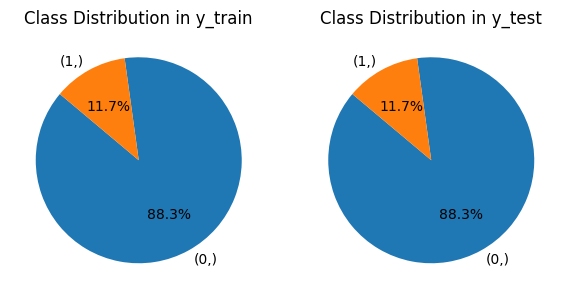

In [23]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [24]:
#데이터다시 불러오기
df = pd.read_csv('./bank_marketing.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

- SMOTE 알고리즘을 통한 oversampling 적용

In [25]:
#최초 1회 실행 후 주석처리
#%pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

- 하기 내용은 이전과 같음

In [27]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환
X_train, X_test = get_numeric_sc(X_train, X_test)

In [28]:
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.94,0.94
test,0.94,0.94


# (선택, 서술형)

- 위 모델링은 데이터 전처리 등 개선할 점이 있습니다. 어떤 부분을 개선하면 좋을까요? 

데이터 전처리 단계에서 개선할 점은 아래와 같습니다.

1. 이상치 보정
    - pdays에는 컨택하지 않았음을 -1 값으로 표시 -> 0 값은 존재하지 않으므로 0값으로 대체
        - 데이터셋은 새로운 direct marketing campaigns (phone calls)을 위해 term deposit을 예측하기 위한 데이터이므로, 이전 캠페인으로부터 이미 경과된 데이터
        - pdays는 '이전 캠페인을 마지막으로 연락한 후 경과한 일수'이므로 0인 경우, 이전 캠패인이 끝난 당일 연락을 했다는 의미이므로 성립할 수 없음
2. 스케일러 적용
    - StandardScaler 적용할 변수: 'previous','pdays','duration', 'balance'
        - duration과 balance 변수를 minmax scaler가 아닌 standard scaler로 바꿨을 때 성능이 더 잘 나왔다
            - 절대적인 수치값보다는 전체 고객의 평균값과 표준편차값으로 분산을 1로 만들어주어, 해당 고객이 얼마나 잔액을 유지하고, 상품 설명 관련 통화에 관심이 있는지를 반영하는 것이 적절하다 판단하였다..!
                - (x-평균)/표준편차
    - MinMaxScaler 적용할 변수: 'age','day_of_week','campaign'

결측치 처리 방법과 카테고리 컬럼을 라벨링하는 방법을 실험해보았으나, dummy를 적용하는 방식이 가장 성능이 좋았습니다.
결측치가 새로 생성되는 피쳐가 모두 False로 적용되며 데이터의 손실없이 보존되므로 이러한 결과를 보이는 것 같습니다.

## 제안하는 개선 내용을 적용한 코드

In [63]:
#데이터 불러오기 
df = pd.read_csv('./bank_marketing.csv')

df = df.dropna(subset=['education'])

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32515, 16) (10839, 16) (32515, 1) (10839, 1)


In [64]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000,43354.000000
mean,40.783111,1355.226715,15.806223,258.199451,2.760184,40.340960,0.584260
std,10.518987,3039.916830,8.306493,258.028124,3.065496,100.331955,2.329661
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1415.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


In [65]:
X.isna().sum()

age                0
job              161
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact        12343
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       35425
dtype: int64

In [66]:
X.job.unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student', nan], dtype=object)

In [67]:
X.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [68]:
X.contact.unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [69]:
X.poutcome.unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

<수치형 변수 시각화>
- balance: average yearly balance, 연간 평균 잔액
- day_of_week: last contact day of the week
- duration: last contact duration, in **seconds (numeric)**. Important note: this attribute highly affects the output target (e.g., **if duration=0 then y='no'**). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact), 이번 캠패인 동안 이 고객에게 컨택한 횟수
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; **-1 means client was not previously contacted**), 이전 캠페인을 마지막으로 연락한 후 경과한 일수
- previous: number of contacts performed before this campaign and for this client

In [70]:
df[df.duration=='no']

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y


In [71]:
df[df.pdays==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,NaN,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes


In [72]:
df[df.pdays==0]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y


In [73]:
df.pdays.describe()

count    43354.000000
mean        40.340960
std        100.331955
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

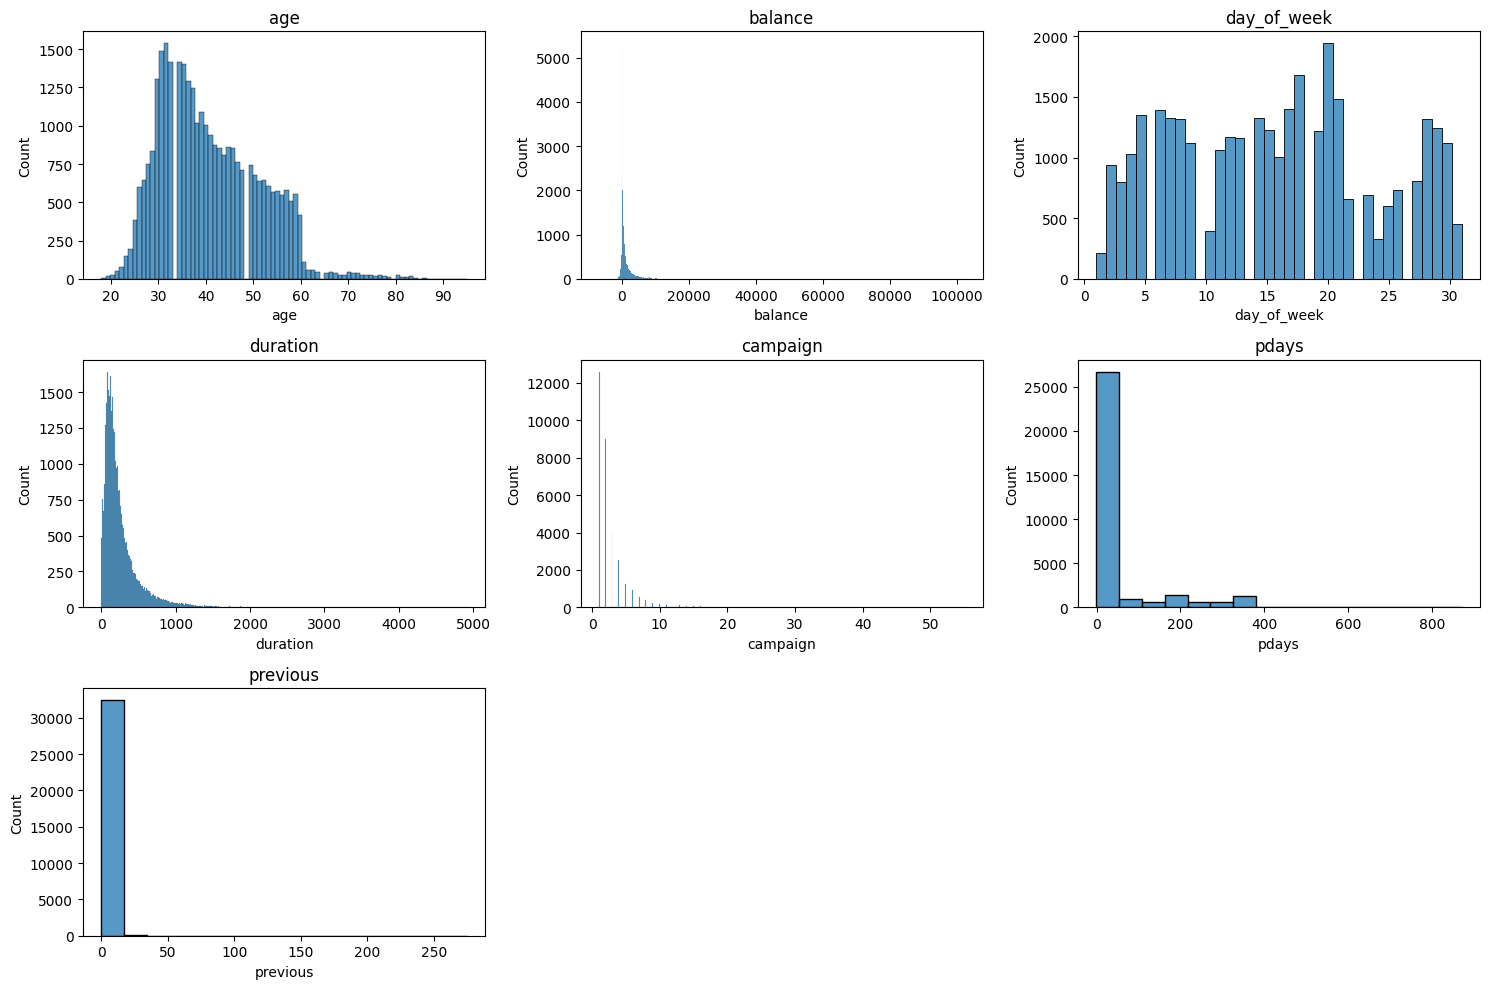

In [74]:
get_3_hist(X_train, numeric_col)

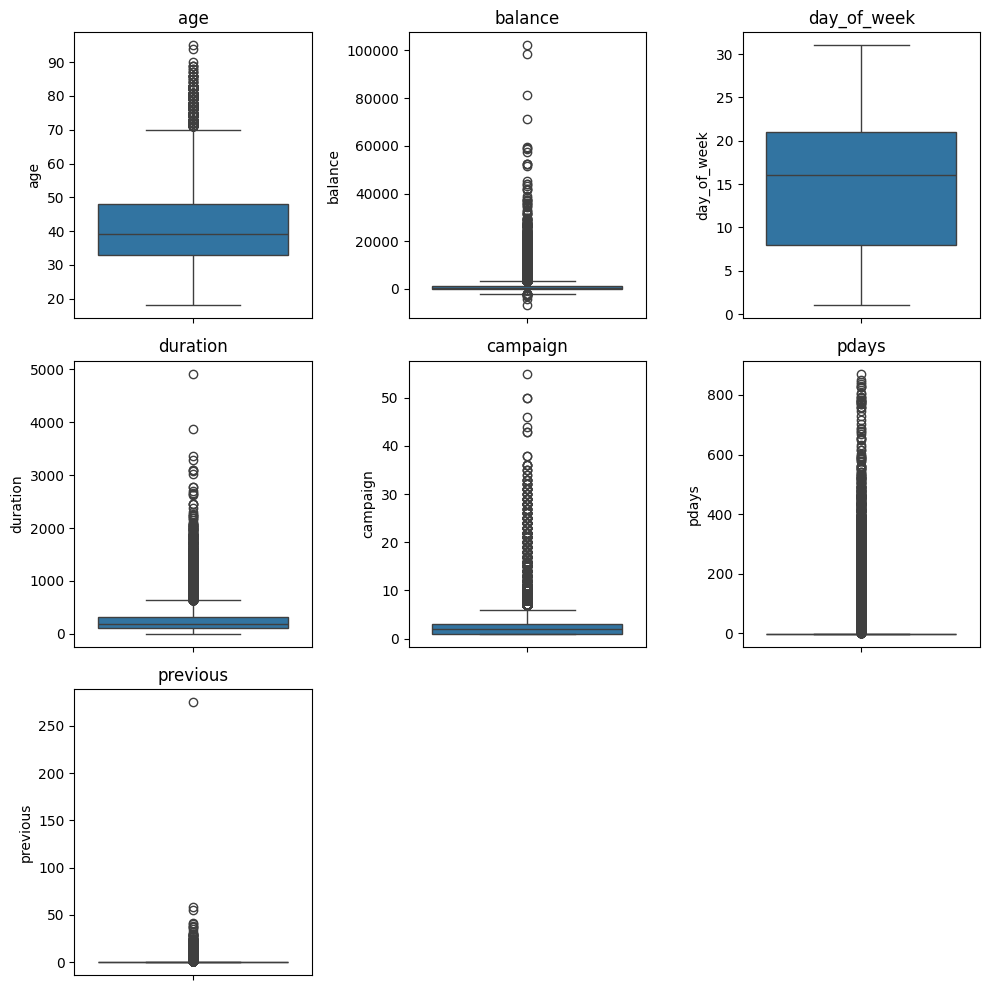

In [75]:
#수치형 변수 시각화
def get_3_box(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 박스플롯을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(10, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.boxplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_box(X_train, numeric_col)

In [76]:
# 이상치가 많은 'duration','balance','previous', 'pdays' 컬럼에 대해서 로그스케일 적용

#balance 값 보정
# train의 최솟값이 -8019값인 상태, 양의 정수만을 갖도록 보정
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

#pdays 값 보정
# pdays에는 컨택하지 않았음을 -1 값으로 표시 -> 0 값은 존재하지 않으므로 0값으로 대체
# 데이터셋은 새로운 direct marketing campaigns (phone calls)을 위해 term deposit을 예측하기 위한 데이터이므로, 이전 캠페인으로부터 이미 경과된 데이터
# pdays는 '이전 캠페인을 마지막으로 연락한 후 경과한 일수'이므로 0인 경우, 이전 캠패인이 끝난 당일 연락을 했다는 의미이므로 성립할 수 없음
X_train['pdays'] = X_train['pdays'].apply(lambda x: 0 if x==-1 else x)
X_test['pdays'] = X_test['pdays'].apply(lambda x: 0 if x==-1 else x)


#로그스케일 적용
# np.log 사용시, 0(최솟값)에서 inf 값을 갖게 되므로, log1p를 사용해서 x+1값에 log를 취하도록 함
for col in ['duration','balance','previous', 'pdays']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [77]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,32515.000000,32515.000000,32515.000000,32515.000000,32515.000000,32515.000000,32515.000000
mean,40.813594,9.117968,15.790958,5.172791,2.761556,0.961433,0.226827
std,10.524533,0.207565,8.310418,0.917540,3.054126,2.052730,0.533499
min,18.000000,7.067320,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,8.998260,8.000000,4.644391,1.000000,0.000000,0.000000
50%,39.000000,9.043341,16.000000,5.198497,2.000000,0.000000,0.000000
75%,48.000000,9.151969,21.000000,5.765191,3.000000,0.000000,0.000000
max,95.000000,11.609571,31.000000,8.500861,55.000000,6.770789,5.620401


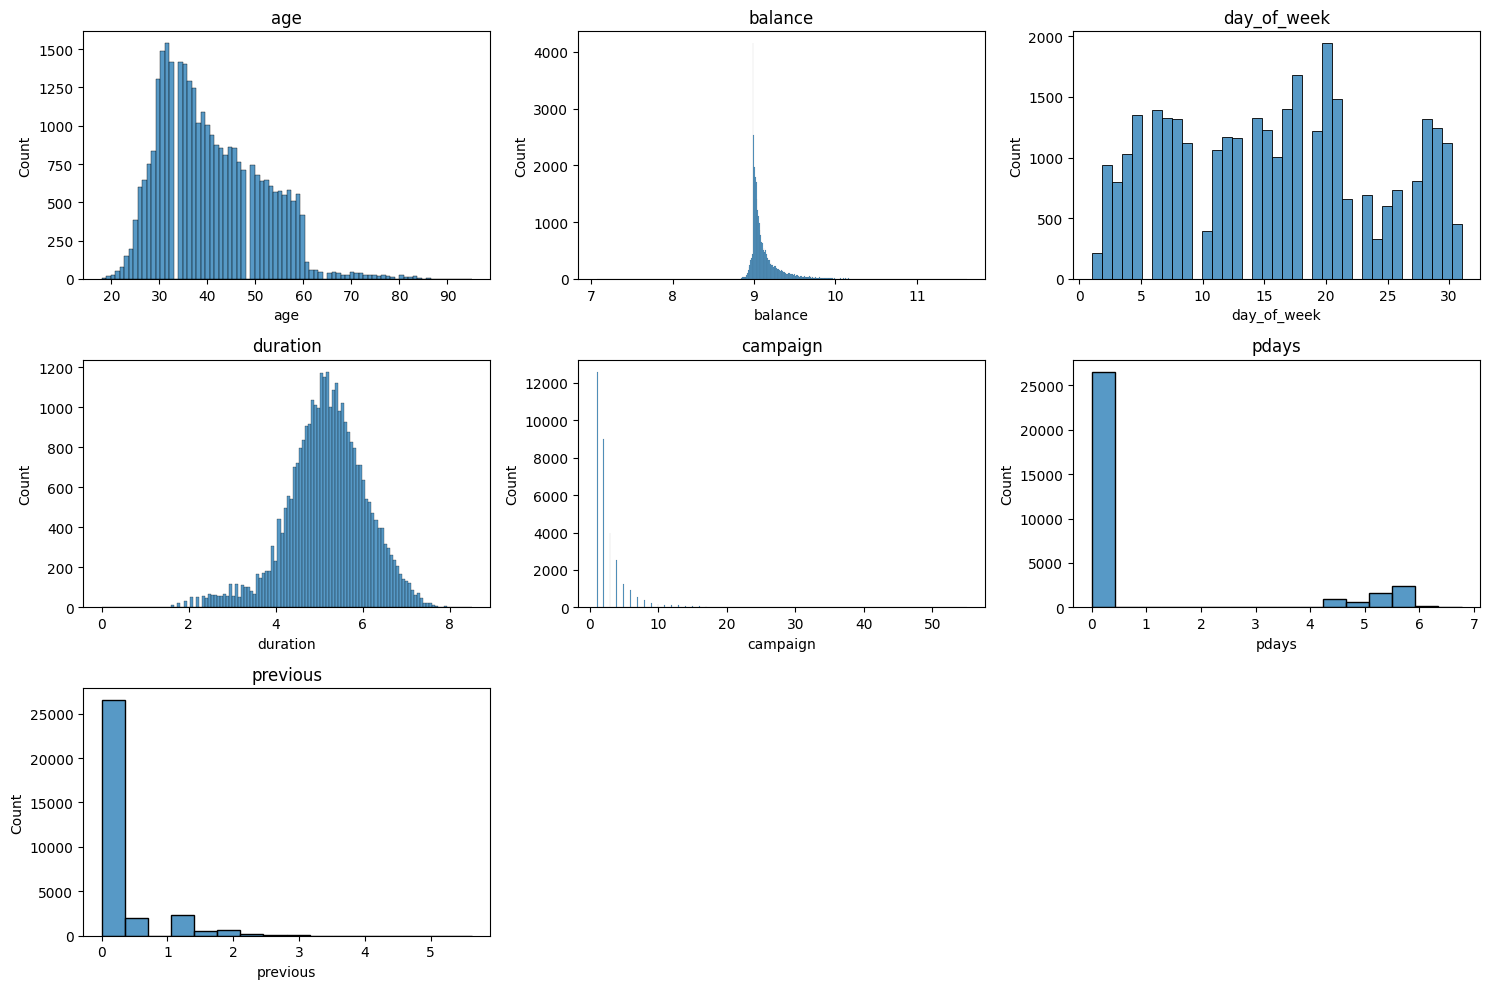

In [78]:
get_3_hist(X_train, numeric_col)

In [79]:
def get_binary(x):
    """
    주어진 문자열 x가 'no'일 경우 0을 반환하고, 그렇지 않을 경우 1을 반환합니다.
    이 함수는 일반적으로 두 가지 범주(예: 'yes'와 'no')를 가진 데이터를 이진 형식(0과 1)으로 변환하는 데 사용됩니다.

    Args:
        x (str): 변환할 문자열. 'no' 또는 그 외의 값을 가질 수 있습니다.
    Returns:
        int: 문자열 x가 'no'일 경우 0, 그렇지 않을 경우 1을 반환합니다.
    """
    # 이부분을 작성해주세요
    if x=='no':
        return 0
    else: 
        return 1
    
# y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)

# y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)

#잘 적용되었는지 확인
display(y_train[:10])

,y
34848,0
40069,0
20457,0
22723,0
23483,0
5175,0
30380,0
42532,1
29688,0
1667,0


In [80]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
34848,43,management,married,primary,no,9.000607,no,yes,cellular,6,may,5.351858,1,0.000000,0.000000,NaN
40069,48,management,married,tertiary,no,8.988446,no,no,cellular,4,jun,4.976734,1,0.000000,0.000000,NaN
20457,33,technician,single,secondary,no,9.087834,yes,no,cellular,12,aug,4.077537,4,0.000000,0.000000,NaN
22723,47,technician,married,secondary,no,9.211340,yes,yes,cellular,25,aug,4.691348,4,0.000000,0.000000,NaN
23483,34,entrepreneur,married,secondary,no,9.044994,yes,yes,cellular,28,aug,4.927254,8,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,24,blue-collar,married,secondary,no,9.071653,yes,no,NaN,26,may,6.799056,3,0.000000,0.000000,NaN
16970,35,blue-collar,married,primary,no,9.027018,yes,no,cellular,25,jul,5.129899,2,0.000000,0.000000,NaN
44111,59,management,married,secondary,no,9.003439,no,no,telephone,8,jul,5.746203,2,5.945421,1.386294,failure
20651,47,blue-collar,married,primary,no,9.058354,no,no,cellular,12,aug,6.762730,3,0.000000,0.000000,NaN


In [81]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    """ train과 test 데이터와 X변수 컬럼을 받아 평가지표를 내는 함수입니다.

    Args:
        train (pd.DataFrame): train 데이터프레임
        test (pd.DataFrame): test 데이터프레임
        x_var_list (list): 모델링에 사용할 변수 리스트
    """
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    #모델가져오기 & 학습하기
    model = LogisticRegression()
    lr_model = model.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    
    #평가표 생성
    result = pd.DataFrame({'acc' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
                            'f1_score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)],
                            'recall':[recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)],
                            'precision':[precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)]
                            },
                            index = ['train','test'])
    
    display(result.round(4))

# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

,acc,f1_score,recall,precision
train,0.8892,0.2273,0.1403,0.5989
test,0.8898,0.2356,0.1461,0.6073


In [82]:
get_score(X_train, X_test, numeric_col)
# pdays에 log를 취한 경우, f1 score가 이전보다 상승 (이전 train 0.24 / test 0.23)

,acc,f1_score,recall,precision
train,0.8884,0.2665,0.1744,0.5642
test,0.8878,0.2558,0.1660,0.5573


In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """데이터를 전달받아 수치형 변수 스케일링하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrame: train, test 데이터프레임
    """
    # 수치형변수
    # age, balance, day_of_week, duration, campaign, pdays, previous
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['previous','pdays','duration', 'balance']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','day_of_week','campaign']
    
    #모델 가져오기
    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    X_train[sc_col] = std_scaler.fit_transform(X_train[sc_col])
    X_test[sc_col] = std_scaler.transform(X_test[sc_col])
    
    #train, test 데이터변환(MinMax Scaler이용)
    X_train[mm_col] = minmax_scaler.fit_transform(X_train[mm_col])
    X_test[mm_col] = minmax_scaler.transform(X_test[mm_col])
    
    
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [84]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

,acc,f1_score,recall,precision
train,0.8884,0.2665,0.1744,0.5642
test,0.8877,0.2566,0.1668,0.5556


In [85]:
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,32515.000000,32388,32515,32515,32515,3.251500e+04,32515,32515,23284,32515.000000,32515,3.251500e+04,32515.000000,3.251500e+04,3.251500e+04,5959
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,6962,19584,17408,31927,NaN,18224,27238,21238,NaN,9944,NaN,NaN,NaN,NaN,3526
mean,0.296280,NaN,NaN,NaN,NaN,-1.549798e-15,NaN,NaN,NaN,0.493032,NaN,-7.202672e-16,0.032621,-3.911645e-17,2.666038e-17,NaN
std,0.136682,NaN,NaN,NaN,NaN,1.000015e+00,NaN,NaN,NaN,0.277014,NaN,1.000015e+00,0.056558,1.000015e+00,1.000015e+00,NaN
min,0.000000,NaN,NaN,NaN,NaN,-9.879707e+00,NaN,NaN,NaN,0.000000,NaN,-5.637759e+00,0.000000,-4.683750e-01,-4.251746e-01,NaN
25%,0.194805,NaN,NaN,NaN,NaN,-5.767315e-01,NaN,NaN,NaN,0.233333,NaN,-5.758965e-01,0.000000,-4.683750e-01,-4.251746e-01,NaN
50%,0.272727,NaN,NaN,NaN,NaN,-3.595409e-01,NaN,NaN,NaN,0.500000,NaN,2.801674e-02,0.018519,-4.683750e-01,-4.251746e-01,NaN
75%,0.389610,NaN,NaN,NaN,NaN,1.638152e-01,NaN,NaN,NaN,0.666667,NaN,6.456494e-01,0.037037,-4.683750e-01,-4.251746e-01,NaN


In [86]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """ 데이터를 전달받아 범주형 변수 더미화하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrmae, list: train, test 데이터프레임, 더미화된 컬럼
    """
    
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #범주형 컬럼 더미화 하기
    X_train_dummies = pd.get_dummies(X_train[category_col])
    X_test_dummies = pd.get_dummies(X_test[category_col])
    
    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
    return X_train, X_test, X_train_dummies.columns.to_list()
    

X_train, X_test, col_dummies = get_category(X_train,X_test)

In [87]:
len(col_dummies)

40

In [88]:
get_score(X_train, X_test, numeric_col + col_dummies)

,acc,f1_score,recall,precision
train,0.9051,0.4722,0.3655,0.6668
test,0.9023,0.4521,0.3471,0.6484


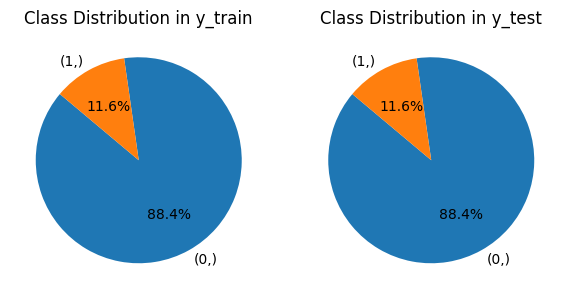

In [89]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [90]:
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
count,32515.000000,32388,32515,32515,32515,3.251500e+04,32515,32515,23284,32515.000000,...,32515,32515,32515,32515,32515,32515,32515,32515,32515,32515
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,6962,19584,17408,31927,NaN,18224,27238,21238,NaN,...,27544,28745,32181,22571,29624,31997,32113,28989,31163,31434
mean,0.296280,NaN,NaN,NaN,NaN,-1.549798e-15,NaN,NaN,NaN,0.493032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.136682,NaN,NaN,NaN,NaN,1.000015e+00,NaN,NaN,NaN,0.277014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,-9.879707e+00,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.194805,NaN,NaN,NaN,NaN,-5.767315e-01,NaN,NaN,NaN,0.233333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.272727,NaN,NaN,NaN,NaN,-3.595409e-01,NaN,NaN,NaN,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.389610,NaN,NaN,NaN,NaN,1.638152e-01,NaN,NaN,NaN,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#데이터다시 불러오기
df = pd.read_csv('./bank_marketing.csv')

df = df.dropna(subset=['education'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [93]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

#pdays -1 값을 0으로 치환 (이후, log scale 적용)
X_train['pdays'] = X_train['pdays'].apply(lambda x: 0 if x==-1 else x)
X_test['pdays'] = X_test['pdays'].apply(lambda x: 0 if x==-1 else x)

# 로그스케일 적용
for col in ['duration','balance','previous', 'pdays']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환 (StandardScaler, MinMaxScaler)
X_train, X_test = get_numeric_sc(X_train, X_test)

In [94]:
# education 결측치 제거
get_score(X_train, X_test, X_train.columns.to_list())

,acc,f1_score,recall,precision
train,0.9441,0.9425,0.9156,0.971
test,0.9432,0.9415,0.9137,0.971


In [62]:
# 모든 category 컬럼에 dummy 적용하였을 때의 성능
get_score(X_train, X_test, X_train.columns.to_list())

,acc,f1_score,recall,precision
train,0.9421,0.9404,0.9136,0.9689
test,0.9429,0.9413,0.9157,0.9684
